In [1]:
## RESTART
# imports
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
# data import
data = pd.read_csv("email_raw.csv")

In [3]:
# check data dimensions
texts = []
labels = []
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5573
number of labels:  5573


In [4]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# number of words used as features
max_features = 10000
# cut off the words after seeing 500 words in each document(email)
maxlen = 500


# we will use 80% of data as training, 20% as validation data
training_samples = int(5572 * .8)
validation_samples = int(5572 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

data = pad_sequences(sequences, maxlen=maxlen)

print("data shape: ", data.shape)

np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

False
The number of training 4457, validation 1115 
Found 9006 unique words: 
data shape:  (5573, 500)


In [5]:
# LSTM model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_ltsm = model.fit(texts_train, y_train, epochs=10, batch_size=60, validation_split=0.2)


Epoch 1/10
60/60 [==============================] - 30s 324ms/step - loss: 0.3494 - acc: 0.8760 - val_loss: 0.1999 - val_acc: 0.9675
Epoch 2/10
60/60 [==============================] - 15s 247ms/step - loss: 0.1328 - acc: 0.9689 - val_loss: 0.0916 - val_acc: 0.9731
Epoch 3/10
60/60 [==============================] - 15s 243ms/step - loss: 0.0722 - acc: 0.9829 - val_loss: 0.0529 - val_acc: 0.9854
Epoch 4/10
60/60 [==============================] - 15s 246ms/step - loss: 0.0474 - acc: 0.9885 - val_loss: 0.0648 - val_acc: 0.9776
Epoch 5/10
60/60 [==============================] - 15s 249ms/step - loss: 0.0335 - acc: 0.9921 - val_loss: 0.0459 - val_acc: 0.9843
Epoch 6/10
60/60 [==============================] - 15s 257ms/step - loss: 0.0253 - acc: 0.9941 - val_loss: 0.0493 - val_acc: 0.9854
Epoch 7/10
60/60 [==============================] - 16s 274ms/step - loss: 0.0203 - acc: 0.9952 - val_loss: 0.0539 - val_acc: 0.9843
Epoch 8/10
60/60 [==============================] - 15s 249ms/step - 

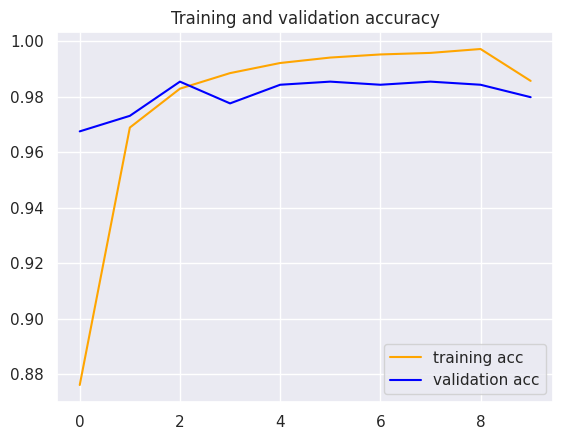

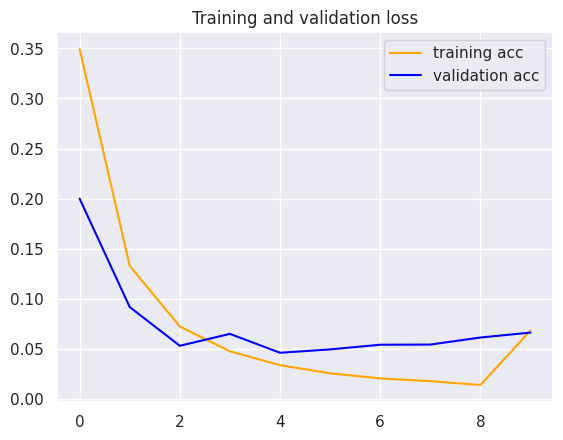

In [6]:
## accuracy stuff
acc = history_ltsm.history['acc']
val_acc = history_ltsm.history['val_acc']
loss = history_ltsm.history['loss']
val_loss = history_ltsm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()